# Description
Use the Simple Moving Average Crossover (and Python) to get buy and sell signals

In [24]:
# Importing libraries
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [32]:
# Define the ticker symbol (stock type)
ticker_symbol = "AAPL"

# Create the ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
period = "1y"
historical_data = ticker.history(period=period)
print("Historical Data:")
print(historical_data)

# Defining the df to prevent overwriting original data
df = historical_data

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-09-03 00:00:00-04:00  227.491245  227.939157  220.145428  221.738022   
2024-09-04 00:00:00-04:00  220.633180  220.752619  216.472536  219.826935   
2024-09-05 00:00:00-04:00  220.603313  224.435469  220.493822  221.349838   
2024-09-06 00:00:00-04:00  222.912548  224.196581  218.751919  219.797058   
2024-09-09 00:00:00-04:00  219.797063  220.244975  215.706102  219.886642   
...                               ...         ...         ...         ...   
2025-08-26 00:00:00-04:00  226.869995  229.490005  224.690002  229.309998   
2025-08-27 00:00:00-04:00  228.610001  230.899994  228.259995  230.490005   
2025-08-28 00:00:00-04:00  230.820007  233.410004  229.339996  232.559998   
2025-08-29 00:00:00-04:00  232.509995  233.380005  231.369995  232.139999   
2025-09-02 00:00:00-04:00  229.250000  230.850006  226.9700

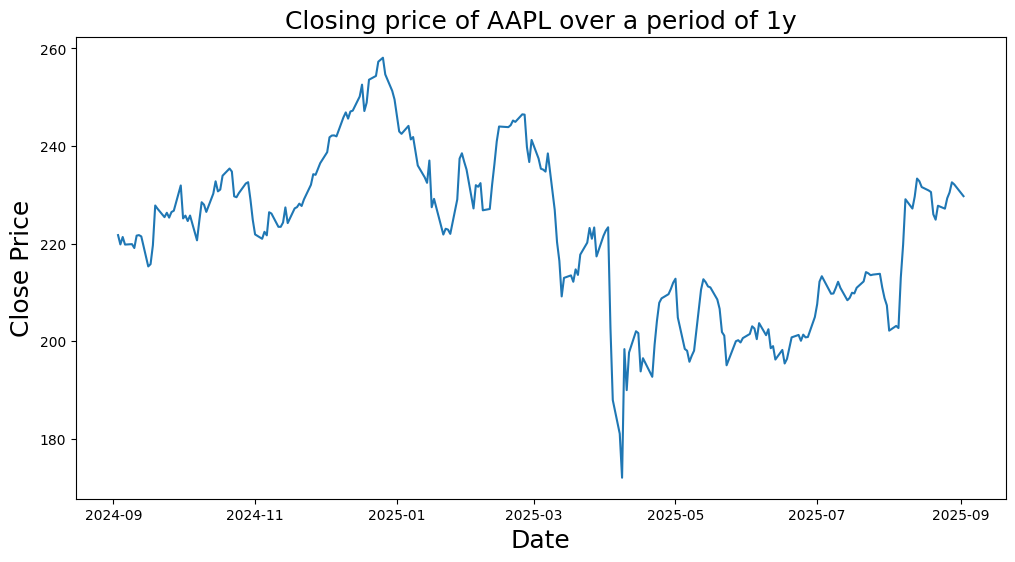

In [33]:
# Visually show the close price
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} over a period of {period}", fontsize=18)
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()

In [34]:
# Create a function to calculate the Simple Moving Average (SMA)

def SMA(data, period=20, column="Close"):
    return data[column].rolling(window=period).mean()

In [ ]:
#Create two new columns to store the 20 and 50 day SMA
df["SMA20"] = SMA(df,period=20)
df["SMA50"] = SMA(df,period=50)

In [38]:
# Get the buy and sell signals
df["Signal"] = np.where(df["SMA20"] > df["SMA50"], 1, 0)
df["Position"] = df["Signal"].diff()
df["Buy"] = np.where(df["Position"] == 1, df["Close"], np.nan)
df["Sell"] = np.where(df["Position"] == -1, df["Close"], np.nan)

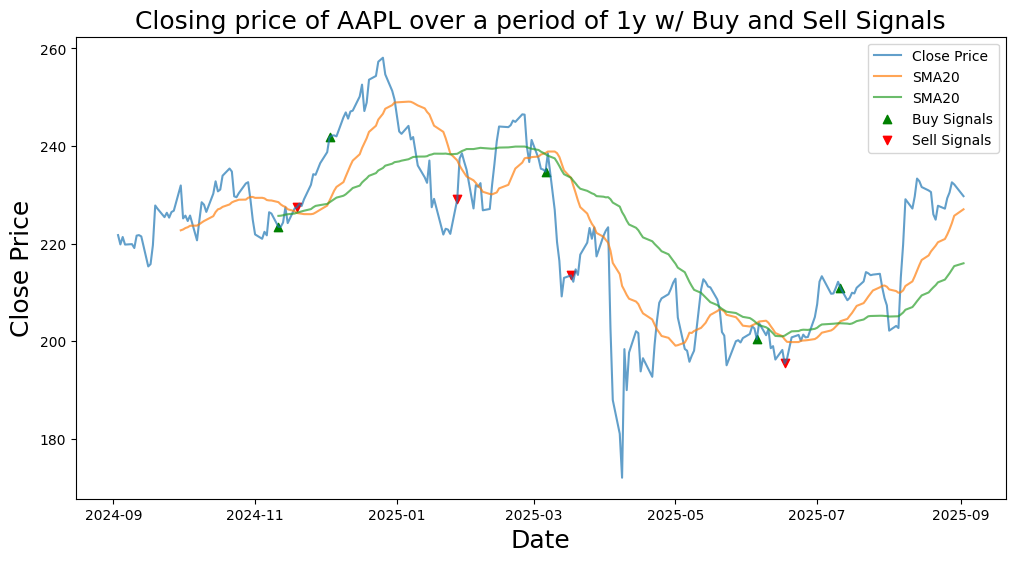

In [43]:
# Show the close price with SMAs and Buy/Sell signals
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} over a period of {period} w/ Buy and Sell Signals", fontsize=18)
plt.plot(df["Close"],alpha=0.7,label="Close Price")
plt.plot(df["SMA20"],alpha=0.7,label="SMA20")
plt.plot(df["SMA50"],alpha=0.7,label="SMA20")
plt.scatter(df.index, df["Buy"],alpha=1,label="Buy Signals",marker="^",color="green")
plt.scatter(df.index, df["Sell"],alpha=1,label="Sell Signals",marker="v",color="red")

plt.legend()
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()